# Q2

In [3]:
import cv2 # just for reading the image 
import numpy as np 
import matplotlib.pyplot as plt

read image "q2.png"

In [4]:
img = cv2.imread("q2.png", 0)

plot the image

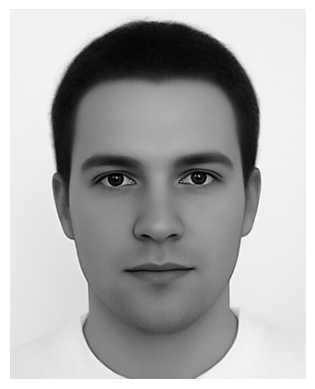

In [5]:
### YOUR CODE ###
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
def segment(image,seed_point,threshold,neighbor_mode=0):
    segmented_image = image.copy()
    ### neighbor_mode=0 => 4-connectivity
    ### neighbor_mode=1 => 8-connectivity
    ### YOUR CODE ###
    height, width = image.shape
    segmented_image = np.zeros_like(image, dtype = np.uint8)
    visited = np.zeros_like(image, dtype= bool)

    seed_x, seed_y = seed_point
    seed_value = image[seed_x, seed_y]
    queue=[(seed_x, seed_y)]
    visited[seed_x, seed_y] = True
    segmented_image[seed_x, seed_y] = 255

    if neighbor_mode == 0:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    else:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.pop(0)
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                if abs(int(image[nx, ny]) - int(seed_value)) <= threshold:
                    segmented_image[nx, ny] = 255
                    queue.append((nx, ny))
                visited[nx, ny] = True

    return segmented_image

In [14]:
### YOUR CODE ###
seed_point= (110, 99)
threshold= 60

In [15]:
segmented_image_4 = segment(img,seed_point,threshold)
segmented_image_8 = segment(img,seed_point,threshold,1)

plot the results and compare them

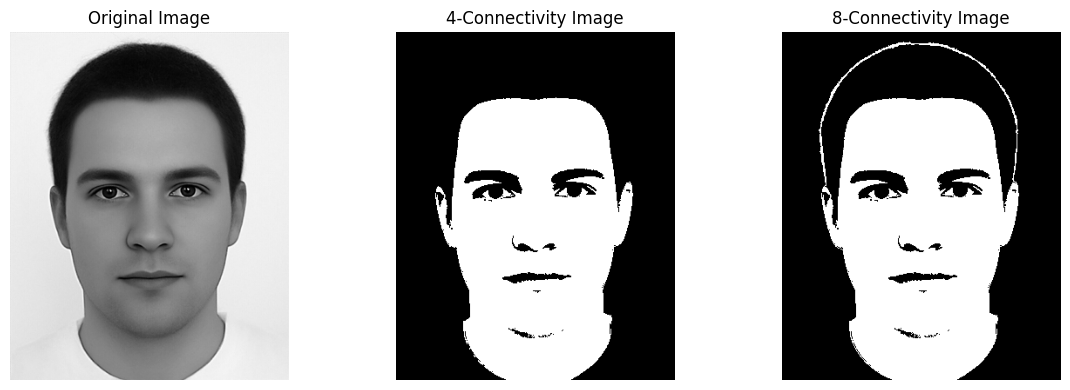

In [16]:
### YOUR CODE ###
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image_4, cmap = 'gray')
plt.title('4-Connectivity Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image_8, cmap='gray')
plt.title('8-Connectivity Image')
plt.axis('off')

plt.tight_layout()
plt.show()